In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [7]:
dataset = pd.read_csv('G:/Projects/ML projects/ML_Projects/customer to subscription product through app behavior analysis/appdata10.csv')

In [9]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,02-12-2012 01:16,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,19-03-2013 19:19,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN
3,234192,05-07-2013 16:08,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,05-07-2013 16:11
4,51549,26-02-2013 18:50,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,26-02-2013 18:56
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,09-05-2013 13:46,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,0,1,09-05-2013 13:47
49996,169179,09-04-2013 00:05,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,0,1,0,NaN
49997,302367,20-02-2013 22:41,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,NaN
49998,324905,28-04-2013 12:33,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,0,1,28-04-2013 12:35


In [10]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,liked,used_premium_feature,enrolled
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.165000,0.172020,0.621480
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.371184,0.377402,0.485023
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   liked                 50000 non-null  int64 
 9   used_premium_feature  50000 non-null  int64 
 10  enrolled              50000 non-null  int64 
 11  enrolled_date         31074 non-null  object
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [16]:
dataset['hour']= dataset.hour.str.slice(1, 3).astype(int)

In [17]:
dataset2 = dataset.copy().drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,1,0


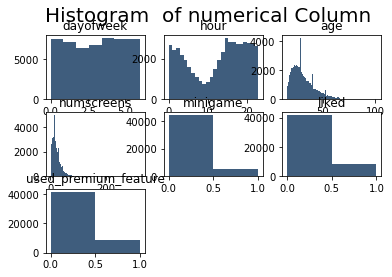

In [27]:
#Histogram
plt.suptitle('Histogram  of numerical Column', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i -1])
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i -1], bins=vals, color = '#3F5D7D')

In [28]:
# correlation

<AxesSubplot:title={'center':'Correlation with responce variable'}>

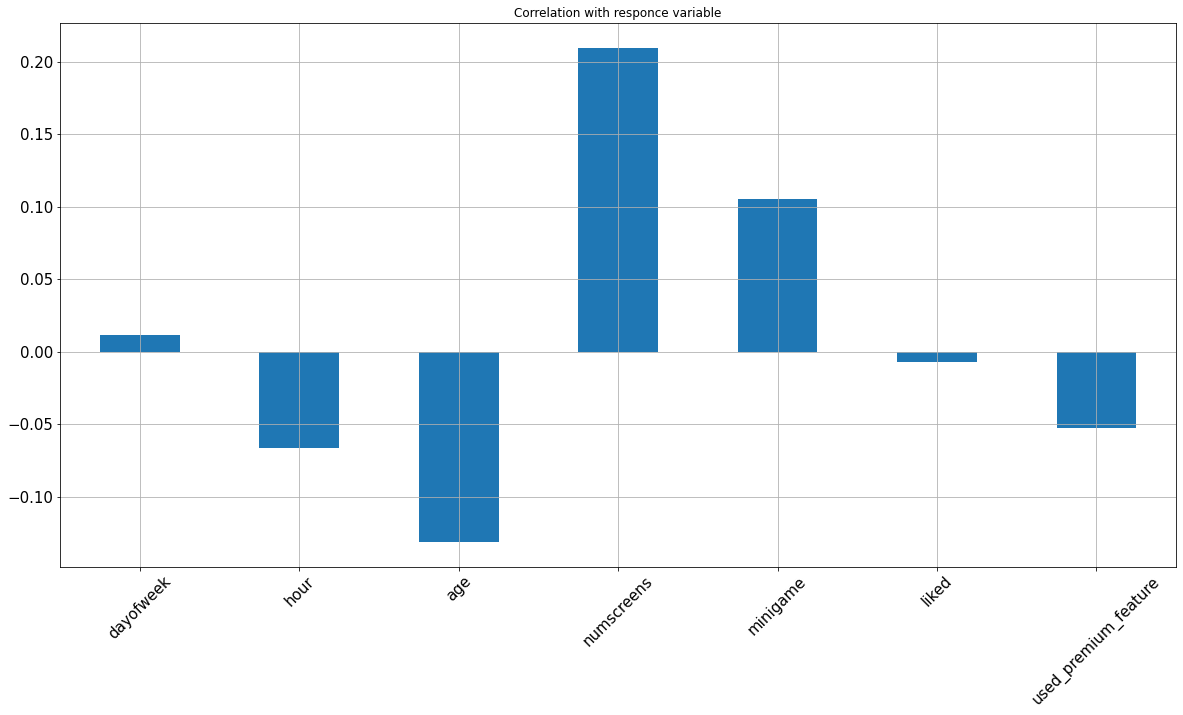

In [31]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10), 
                                             title = 'Correlation with responce variable',
                                            fontsize = 15,
                                            rot = 45,
                                            grid = True)

<AxesSubplot:>

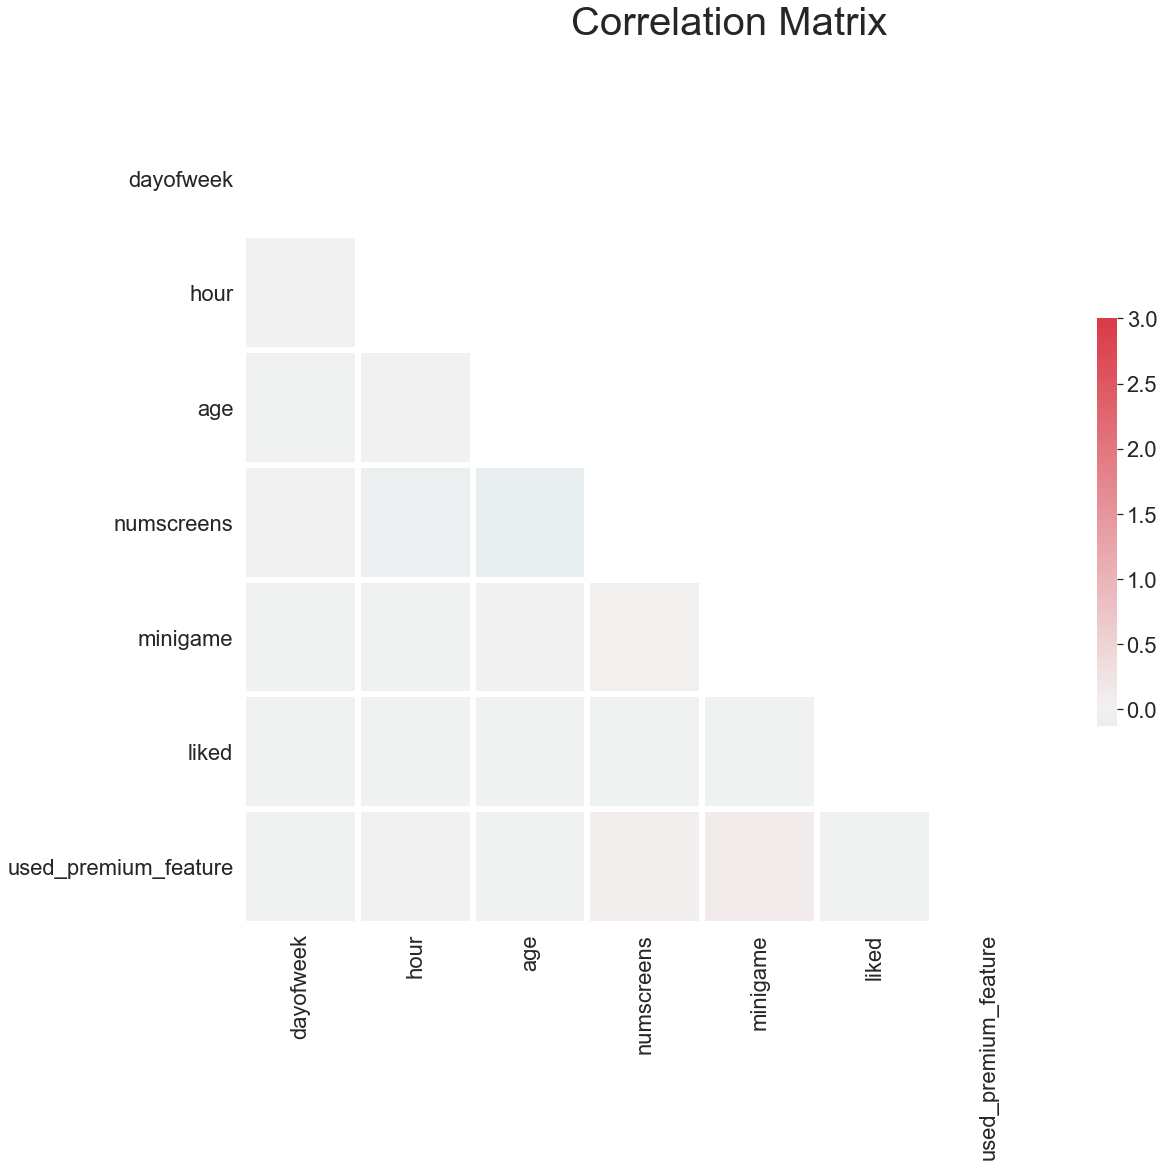

In [44]:
# coelation matrix
sns.set(style = 'white', font_scale = 2)
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 3, center = 0,
          square = True, linewidths = 5, cbar_kws = {"shrink": .5})

In [46]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
liked                    int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
dtype: object

In [48]:
dataset['first_open'] = pd.to_datetime(dataset.first_open)
dataset['enrolled_date'] = pd.to_datetime(dataset.enrolled_date)

In [50]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
liked                            int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
dtype: object

In [52]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,2012-12-27 02:14:00,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaT
1,333588,2012-02-12 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaT
2,254414,2013-03-19 19:19:00,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0,NaT
3,234192,2013-05-07 16:08:00,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-05-07 16:11:00
4,51549,2013-02-26 18:50:00,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:00


In [53]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'Most users who sign up do so within the first 500 hours of app usage')

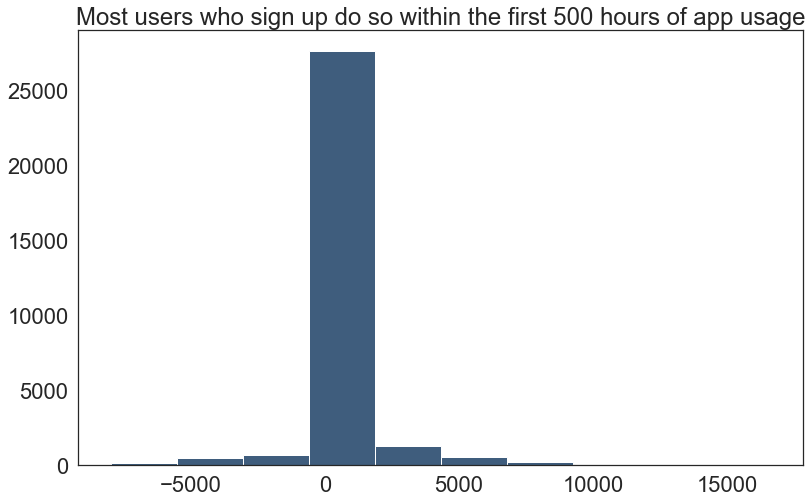

In [54]:
plt.figure(figsize=(13, 8))
plt.hist(dataset['difference'].dropna(), color='#3F5D7D')
plt.title('Most users who sign up do so within the first 500 hours of app usage')

Text(0.5, 1.0, 'Most signups occur within first 10 hours of usage')

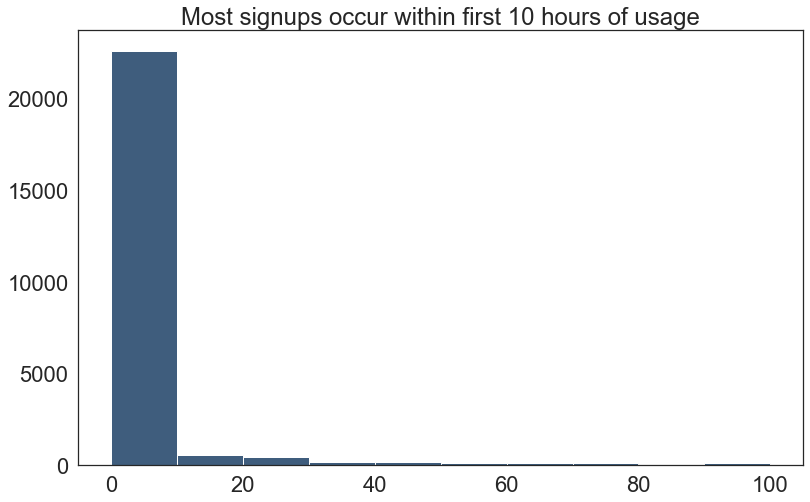

In [55]:
plt.figure(figsize=(13, 8))
plt.hist(dataset['difference'].dropna(), color='#3F5D7D', range=[0, 100])
plt.title('Most signups occur within first 10 hours of usage')

Text(0.5, 1.0, 'Most signups occur within first hour of usage')

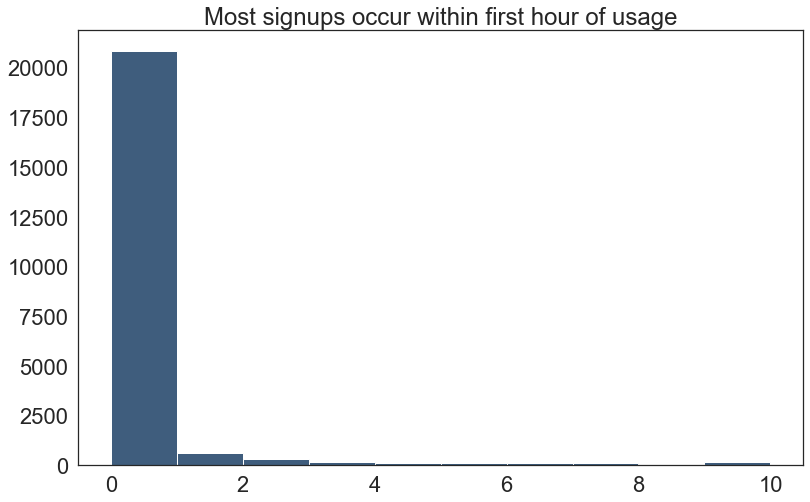

In [56]:
plt.figure(figsize=(13, 8))
plt.hist(dataset['difference'].dropna(), color='#3F5D7D', range=[0, 10])
plt.title('Most signups occur within first hour of usage')

In [58]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [59]:
df = dataset.drop(['difference', 'enrolled_date', 'first_open'], axis=1)

In [60]:
# feature engineering

In [61]:
top_screens = pd.read_csv('G:/Projects/ML projects/ML_Projects/customer to subscription product through app behavior analysis/top_screens.csv')

In [62]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [63]:
top_screens = top_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [64]:
df['screen_list'] = df.screen_list.astype(str) + ','

for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+',', '')
    
df["other"] = df.screen_list.str.count(',')

In [65]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,1,0,1,...,0,0,0,0,0,0,0,0,0,10


In [66]:
df = df.drop(['screen_list'], axis=1)

In [67]:
savings_screens = [
    "Saving1",
    "Saving2",
    "Saving2Amount",
    "Saving4",
    "Saving5",
    "Saving6",
    "Saving7",
    "Saving8",
    "Saving9",
    "Saving10",
]

df["savings_count"] = df[savings_screens].sum(axis=1)

In [68]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,1,0,1,1,...,0,0,0,0,0,0,0,0,10,0


In [69]:
df = df.drop(savings_screens, axis=1)

In [70]:
cm_screens = [
    "Credit1",
    "Credit2",
    "Credit3",
    "Credit3Container",
    "Credit3Dashboard",
]

df["cm_count"] = df[cm_screens].sum(axis=1)
df = df.drop(cm_screens, axis=1)

In [71]:
cc_screens = [
    "CC1",
    "CC1Category",
    "CC3"
]

df["cc_count"] = df[cc_screens].sum(axis=1)
df = df.drop(cc_screens, axis=1)

In [72]:
loan_screens = [
    "Loan",
    "Loan2",
    "Loan3",
    "Loan4"
]

df["loan_count"] = df[loan_screens].sum(axis=1)
df = df.drop(loan_screens, axis=1)

In [73]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,1,0,1,0,...,0,0,0,0,0,10,0,2,0,1


In [74]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'savings_count', 'cm_count', 'cc_count', 'loan_count'],
      dtype='object')

In [76]:
df.to_csv('new_appdata10.csv', index=False)

In [77]:
df = pd.read_csv('new_appdata10.csv')

In [78]:
df.shape

(50000, 50)

In [79]:
import time

In [80]:
response = df.enrolled

In [81]:
df = df.drop(['enrolled'], axis=1)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, response, test_size=0.2, random_state=0)

In [83]:
train_identifier = X_train['user']
X_train = X_train.drop('user', axis=1)

In [84]:
test_identifier = X_test['user']
X_test = X_test.drop('user', axis=1)

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values, index=X_train.index.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values, index=X_test.index.values)

In [88]:
X_train_scaled.head()

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.246319,2.186018,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.445173,-0.457453,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.445173,-0.457453,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.445173,-0.457453,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.445173,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


In [89]:
X_test_scaled.head()

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,cm_count,cc_count,loan_count
11841,-1.489818,-1.553579,0.856728,0.819520,-0.34683,2.246319,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
19602,0.972325,-0.881364,-0.528611,0.564865,-0.34683,-0.445173,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800
45519,-1.489818,0.328622,0.487305,-0.644744,-0.34683,-0.445173,2.186018,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,0.057524,-0.289185,1.785389
25747,0.972325,0.866394,-0.990390,-0.517417,-0.34683,2.246319,-0.457453,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,-0.260877,-0.763372,-0.289185,-1.165789
42642,0.972325,-1.553579,-0.159187,0.692193,-0.34683,-0.445173,-0.457453,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.604204,1.857638,-0.763372,2.962372,-1.165789


In [90]:
# model building

In [91]:
from sklearn.linear_model import LogisticRegression

In [94]:
clf = LogisticRegression()

In [95]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [96]:
y_pred = clf.predict(X_test_scaled)

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

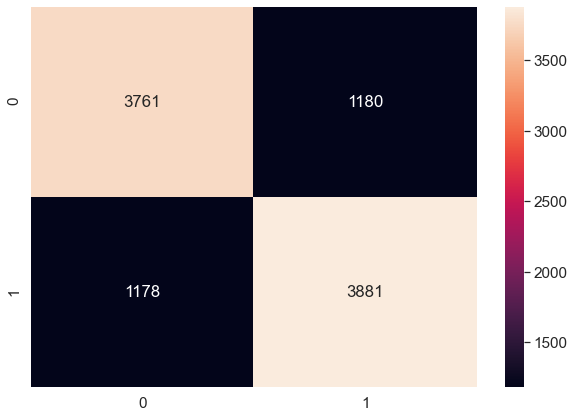

In [99]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(pd.DataFrame(cm, index=(0,1), columns=(0,1)), annot=True, fmt='g')
#print('Test data accuracy: {:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      4941
           1       0.77      0.77      0.77      5059

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
acc = cross_val_score(clf, X_train_scaled, y_train, cv=10)

In [103]:
print("Logistic Accuracy: {:0.3f} (+/- {:0.3f} std. dev)".format(acc.mean(), acc.std()))

Logistic Accuracy: 0.762 (+/- 0.006 std. dev)


In [104]:
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()

In [105]:
final_results['predicted'] = y_pred

In [106]:
final_results = final_results[['user', 'enrolled', 'predicted']].reset_index(drop=True)

In [107]:
final_results

,user,enrolled,predicted
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
